# Youtube Likes,views,comment&Dislike Prediction

## Table of content
* 1.Machine Learning Formulation
    * 1.1 Data Overview
    * 1.2  Attribute-information
* 2.EDA
* 3.Feature Engineering
    * 3.1 publish_weekday-Day at which video is publish
    * 3.2 No of Tags-No of tag video contain
    * 3.3 Length of description-Length of video description
    * 3.4 Ratio's
         * 3.4.1 Ratio of View and likes
         * 3.4.2 Ratio of view and dislikes
         * 3.4.3 Ratio of view and comment_count
         * 3.4.4 Ratio of likes and dislikes
* 4.Correlation matrix
* 5.Machine Learning(metric=r^2 score )
    * 5.1-View Predicition
         * 5.1.1-Splitting the data into train and Test(80:20)
         * 5.1.2-Linear Regression
         * 5.1.3-Random Forest
         * 5.1.4-SVM
              
  * 5.2 -Like Predicition
       * 5.2.1-Splitting the data into train and Test(80:20)
       * 5.2.2-Linear Regression
       * 5.2.3-Random Forest
       * 5.2.4-SVM
  * 5.3-comment Count Predicition
      * 5.3.1-Splitting the data into train and Test(80:20)
      * 5.3.2-Linear Regression
      * 5.3.3-Random Forest
      * 5.3.4-SVM
* 6.Conclusion

## 1.Machine Learning Formulation
### 1.1 Data Overviews
Contain one file

#### 1.2 Attribute-information
* video_id-Unique video id
* trending_date-the date at which video start trending
* title-Title of video
* channel_title-video posted by channel
* category_id-there are 15 Category value
* publish_time-at what time video is uplaoded
* tags-tag given to video
* views-no of views
* likes-no of likes
* dislikes-no of dislikes
* comment_count-no of comment




## 2.EDA

### Loading Libary

In [0]:
#Loading library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from nltk.stem import PorterStemmer
import nltk
from sklearn.metrics import r2_score


In [0]:
youtube=pd.read_csv("youtube.csv")

In [0]:
youtube.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date
0,2017-11-14,sharri mann cute munda song teaser parmish ver...,lokdhun punjabi,1,12:20:39,sharri mann| sharri mann new song | sharri man...,1096327,33966,798,882,False,False,False,present sharri mann latest punjabi song cute m...,2017-11-12
1,2017-11-14,stylish star allu arjun chaysam wed recept tfpc,tfpc,24,15:48:08,stylish star allu arjun chaysam wed reception|...,473988,2011,243,149,False,False,False,watch stylish star allu arjun chaysam wed rece...,2017-11-12
2,2017-11-14,eruma saani tamil vs english,eruma saani,23,07:08:48,eruma saani| tamil comedi video | film | movi ...,1242680,70353,1624,2684,False,False,False,video showcas differ peopl speak english tamil...,2017-11-12
3,2017-11-14,samantha becam emot samantha naga chaithanya m...,filmylook,24,01:14:16,filmylooks| latest news | telugu movi | telugu...,464015,492,293,66,False,False,False,samantha becam emot samantha naga chaithanya m...,2017-11-13
4,2017-11-14,mca middl class abbayi teaser nani sai pallavi...,dil raju,24,04:29:50,nenu local| nenu local telugu movi | nani | sa...,6106669,98612,4185,4763,False,False,False,watch mca middl class abbayi first look teaser...,2017-11-10


In [0]:
print(youtube.shape)

(35183, 15)


In [0]:
print(youtube.isnull().values.any())

True


In [0]:
youtube = youtube.dropna(how='any',axis=0)

In [0]:
youtube.describe()

,category_id,views,likes,dislikes,comment_count
count,34917.000000,3.491700e+04,3.491700e+04,3.491700e+04,34917.000000
mean,21.514678,1.111640e+06,2.880395e+04,1.752933e+03,2846.472463
std,6.644845,3.285705e+06,1.002366e+05,1.662139e+04,15363.173362
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.000000
25%,23.000000,1.285040e+05,9.440000e+02,1.150000e+02,91.000000
50%,24.000000,3.197680e+05,3.417000e+03,3.470000e+02,365.000000
75%,24.000000,8.379430e+05,1.546100e+04,1.081000e+03,1401.000000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000


In [0]:
youtube.drop(['video_id','thumbnail_link'],axis=1,inplace=True)

In [0]:
youtube.apply(lambda x: len(x.unique()))

trending_date               205
title                     16431
channel_title              1390
category_id                  17
publish_time              16053
tags                      12463
views                     31638
likes                     15473
dislikes                   5072
comment_count              6024
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description               13992
dtype: int64

False    35611
True      1180
Name: comments_disabled, dtype: int64


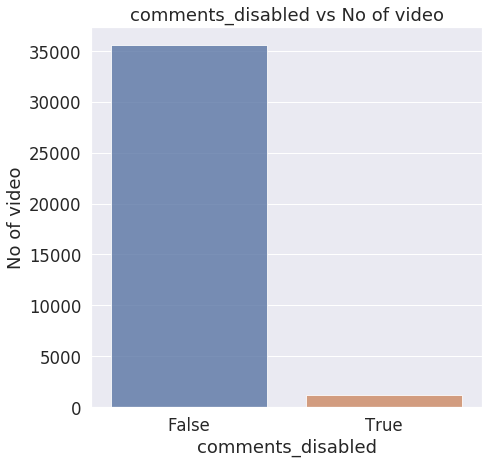

False    36034
True       757
Name: ratings_disabled, dtype: int64


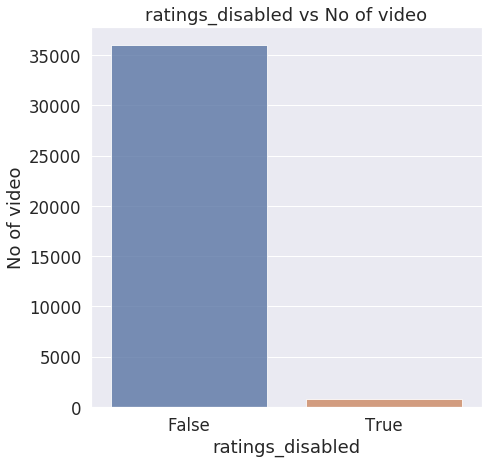

False    36780
True        11
Name: video_error_or_removed, dtype: int64


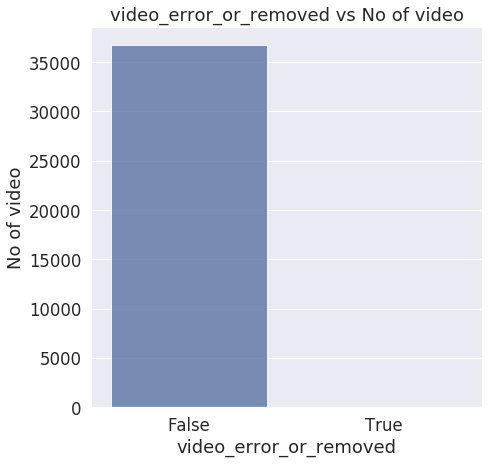

24    16462
25     5173
10     3857
23     3407
22     2494
1      1649
27     1180
26      837
17      712
28      548
43      205
29      105
2        69
20       66
30       16
19        8
15        3
Name: category_id, dtype: int64


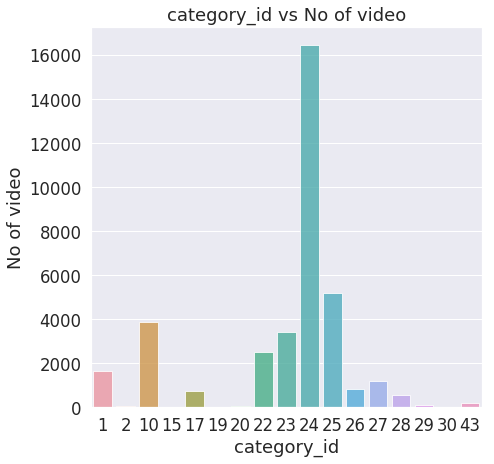

In [0]:
for x in (['comments_disabled','ratings_disabled','video_error_or_removed','category_id']):
  count=youtube[x].value_counts()
  print(count)
  plt.figure(figsize=(7,7))
  sns.barplot(count.index, count.values, alpha=0.8)
  plt.title('{} vs No of video'.format(x))
  plt.ylabel('No of video')
  plt.xlabel('{}'.format(x))
  plt.show()

## 3.Feature Engineering


 * 3.1 publish_weekday-Day at which video is publish
 * 3.2 No of Tags-No of tag video contain
 * 3.3 Length of description-Length of video description
 * 3.4 Ratio's
    * 3.4.1 Ratio of View and likes
    * 3.4.2 Ratio of view and dislikes
    * 3.4.3 Ratio of view and comment_count
    * 3.4.4 Ratio of likes and dislikes

In [0]:
#No of tags
tags=[x.count("|")+1 for x in youtube["tags"]]
youtube["No_tags"]=tags

In [0]:
#length of desription
desc_len=[len(x) for x in youtube["description"]]
youtube["desc_len"]=desc_len

In [0]:
#length of title
title_len=[len(x) for x in youtube["title"]]
youtube["len_title"]=title_len

In [142]:
youtube['trending_date'] = pd.to_datetime(youtube['trending_date'], format='%Y-%d-%m')
publish_time = pd.to_datetime(youtube['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
youtube['publish_time'] = publish_time.dt.time
youtube['publish_date'] = publish_time.dt.date

#day at which video is publish
youtube['publish_weekday']=publish_time.dt.weekday_name

"youtube['trending_date'] = pd.to_datetime(youtube['trending_date'], format='%Y-%d-%m')\npublish_time = pd.to_datetime(youtube['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')\nyoutube['publish_time'] = publish_time.dt.time\nyoutube['publish_date'] = publish_time.dt.date\n\n#day at which video is publish\nyoutube['publish_weekday']=publish_time.dt.weekday_name"

In [0]:
#ratio of view/likes  upto 3 decimal
youtube["Ratio_View_likes"]=round(youtube["views"]/youtube["likes"],3)
#ratio of view/dislikes  upto 3 decimal
youtube["Ratio_View_dislikes"]=round(youtube["views"]/youtube["dislikes"],3)
#ratio of view/comment_count  upto 3 decimal
youtube["Ratio_views_comment_count"]=round(youtube["views"]/youtube["comment_count"],3)
#ratio of likes/dislikes  upto 3 decimal
youtube["Ratio_likes_dislikes"]=round(youtube["likes"]/youtube["dislikes"],3)

In [145]:
print(max(youtube["Ratio_View_likes"]))
print(max(youtube["Ratio_View_dislikes"]))
print(max(youtube["Ratio_views_comment_count"]))
print(max(youtube["Ratio_likes_dislikes"]))

inf
inf
inf
inf


In [0]:
#removing the infinite values
youtube=youtube.replace([np.inf, -np.inf], np.nan)
youtube = youtube.dropna(how='any',axis=0)

In [0]:
youtube['publish_weekday'] = youtube['publish_weekday'].replace({'Monday':1,
                                                             'Tuesday':2,
                                                             'Wednesday':3,
                                                             'Thursday':4,
                                                             'Friday':5,
                                                             'Saturday':6,
                                                             'Sunday':7})

5    5616
6    5196
4    5056
1    4744
2    4711
3    4520
7    3584
Name: publish_weekday, dtype: int64


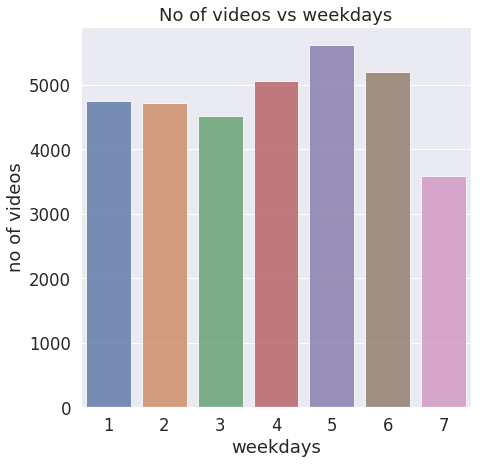

In [148]:
count=youtube["publish_weekday"].value_counts()
print(count)
plt.figure(figsize=(7,7))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('No of videos vs weekdays')
plt.ylabel('no of videos')
plt.xlabel('weekdays')
plt.show()

## 4.Correlation  Matrix


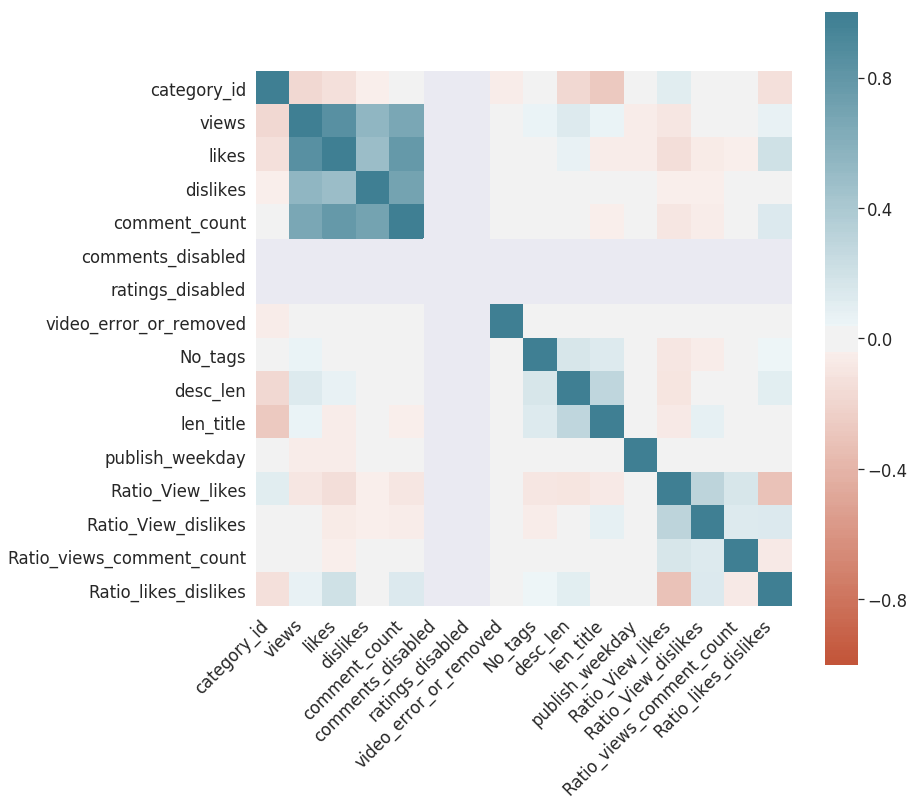

In [129]:
data = youtube

corr = data.corr()
plt.figure(figsize=(12, 12))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Removing non Correlated coloumns

In [0]:
youtube.drop(['trending_date','publish_date','publish_time','tags','title','description','channel_title'],axis=1,inplace=True)

## 5.Machine Learning Models

## 5.1 Prediciting Views

### 5.1.1 spliting the data into train and test in ratio of  80:20 

In [0]:
views=youtube['views']
youtube.drop(['views'],axis=1,inplace=True)

In [0]:
train,test,y_train,y_test=train_test_split(youtube,views, test_size=0.2,shuffle=False)

In [152]:
print(train.shape,test.shape,y_train.shape,y_test.shape)


(26741, 15) (6686, 15) (26741,) (6686,)


## 5.1.2 Linear Regression

In [153]:
# REGRESSION ANALYSIS

# LINEAR REGRESSION

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(train, y_train)

# predicting the  test set results
y_pred = model.predict(test)
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(test, y_test))
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
print(SK)

Root means score 1505083.9931365433
Variance score: 0.73
Result : 0.7348137142197924
       True Labels  Predicted Labels
28345       177502      2.055142e+04
28347        74441     -1.531328e+05
28348       815925      9.823908e+05
28349        97354      1.750057e+04
28350        50153      3.194875e+05
28351      2099662      1.086039e+06
28352        84938      6.290083e+05
28353       220715      6.997252e+05
28354       230147      4.949584e+05
28355      2263689      1.176088e+06
28356       151340      6.680394e+05
28357       130246      1.724558e+05
28358      1926808      2.411916e+06
28359       945068      2.323898e+06
28360       164649      4.949725e+05
28361        50830      2.469210e+05
28362       225049      4.352232e+05
28363       254704     -5.128352e+03
28364        63314     -2.942241e+04
28365       342485      8.126241e+05
28366       813870      1.184761e+06
28367       149297      5.850014e+05
28368       255715      1.599214e+04
28369       255220      4.5

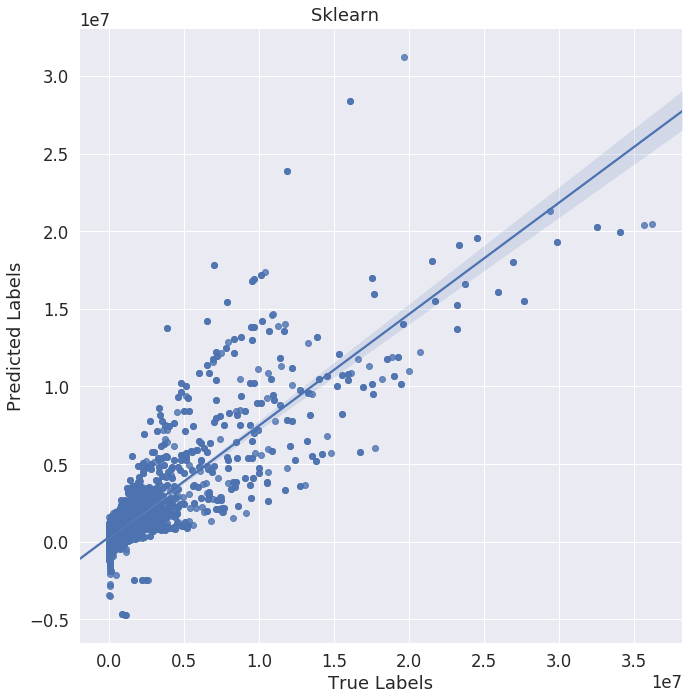

In [154]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, size = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sns.set(font_scale = 1.5)

## 5.1.3 Random Forest

## 5.1.3.1 Hypeparameter Turning

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 55.5min finished
Best HyperParameter:  {'max_depth': 25, 'n_estimators': 180}


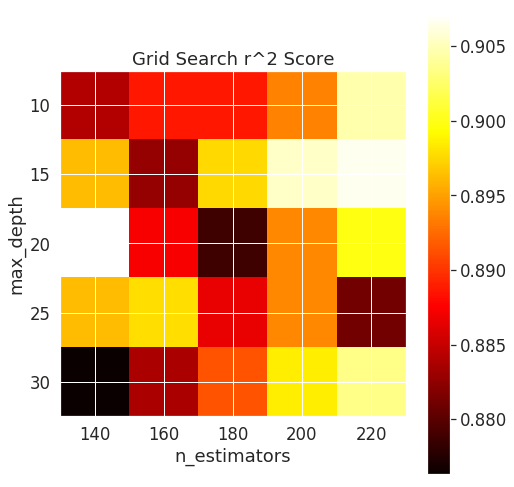

In [0]:
from sklearn.ensemble import RandomForestRegressor
nEstimator = [140,160,180,200,220]
depth = [10,15,20,25,30]

RF = RandomForestRegressor()
hyperParam = [{'n_estimators':nEstimator,'max_depth': depth}]
gsv = GridSearchCV(RF,hyperParam,cv=5,verbose=1,scoring='r2',n_jobs=-1)
gsv.fit(train, y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
scores = gsv.cv_results_['mean_test_score'].reshape(len(nEstimator),len(depth))
plt.figure(figsize=(8, 8))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.colorbar()
plt.xticks(np.arange(len(nEstimator)), nEstimator)
plt.yticks(np.arange(len(depth)), depth)
plt.title('Grid Search r^2 Score')
plt.show()

## 5.1.3.2 Random Forest using Optimal Hyperparameter

In [0]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 180,max_depth=20)
model.fit(train, y_train)


# predicting the  test set results
y_pred = model.predict(test)
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(test, y_test))
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
print(SK)

Root means score 363278.23332000454
Variance score: 0.98
Result : 0.9845507165832265
       True Labels  Predicted Labels
28345       177502      1.772429e+05
28347        74441      7.440838e+04
28348       815925      8.208192e+05
28349        97354      9.748614e+04
28350        50153      5.106222e+04
28351      2099662      2.136763e+06
28352        84938      8.564532e+04
28353       220715      2.194662e+05
28354       230147      2.289676e+05
28355      2263689      2.298827e+06
28356       151340      1.524691e+05
28357       130246      1.304047e+05
28358      1926808      1.956698e+06
28359       945068      9.330612e+05
28360       164649      1.659485e+05
28361        50830      5.137284e+04
28362       225049      2.214381e+05
28363       254704      2.535765e+05
28364        63314      6.214717e+04
28365       342485      3.452336e+05
28366       813870      8.176777e+05
28367       149297      1.493099e+05
28368       255715      2.581466e+05
28369       255220      2.5

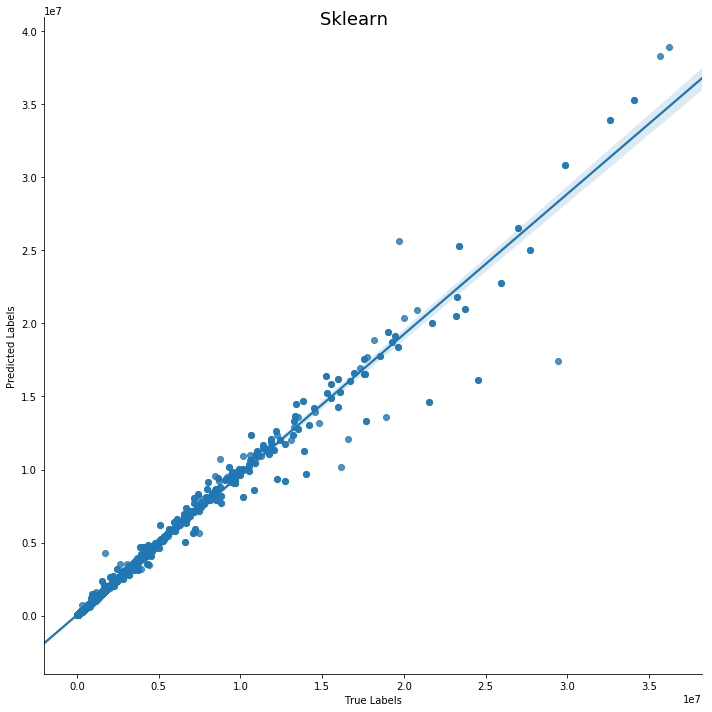

In [0]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, size = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sns.set(font_scale = 1.5)


## 5.1.4 Support Vector Machine

## 5.1.4.1 Hyper parameter Turning

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 15.7min finished
Best HyperParameter:  {'C': 10, 'gamma': 0.001}
-0.06939063835469278


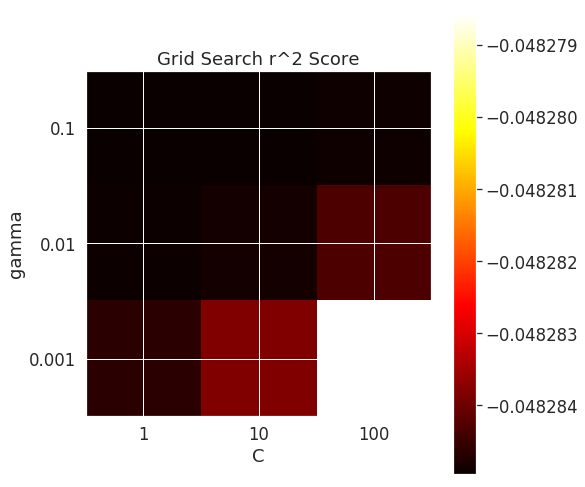

In [0]:
from sklearn.svm import SVR
sv = SVR(kernel='rbf')
C=[1, 10, 100]
gamma=[0.1,0.01,0.001]
hyperParam = [{'C':C,'gamma':gamma}]
gsv = GridSearchCV(sv,hyperParam,cv=5,verbose=1,scoring='r2',n_jobs=-1)
gsv.fit(train, y_train)

print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
scores = gsv.cv_results_['mean_test_score'].reshape(len(C),len(gamma))

plt.figure(figsize=(8, 8))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('C')
plt.ylabel('gamma')
plt.colorbar()
plt.xticks(np.arange(len(C)), C)
plt.yticks(np.arange(len(gamma)), gamma)
plt.title('Grid Search r^2 Score')
plt.show()

## 5.1.4.2 SVM using Optimal Hyperparameter

In [0]:
model = SVR(kernel='rbf',C=10,gamma=0.001)
model.fit(train, y_train)


# predicting the  test set results
y_pred = model.predict(test)
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(test, y_test))
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
print(SK)

Root means score 3103564.659525556
Variance score: -0.13
Result : -0.12758991366727845
       True Labels  Predicted Labels
28345       177502     298925.000000
28347        74441     298924.999963
28348       815925     298925.000000
28349        97354     298925.000000
28350        50153     298924.999928
28351      2099662     298925.000000
28352        84938     298925.000000
28353       220715     298925.000000
28354       230147     298924.588378
28355      2263689     298925.000000
28356       151340     298925.000000
28357       130246     298924.999781
28358      1926808     298925.000000
28359       945068     298925.000000
28360       164649     298924.999998
28361        50830     298924.942072
28362       225049     298925.000000
28363       254704     298925.000000
28364        63314     298924.999990
28365       342485     298925.000000
28366       813870     298925.000000
28367       149297     298925.000000
28368       255715     298925.000000
28369       255220     29

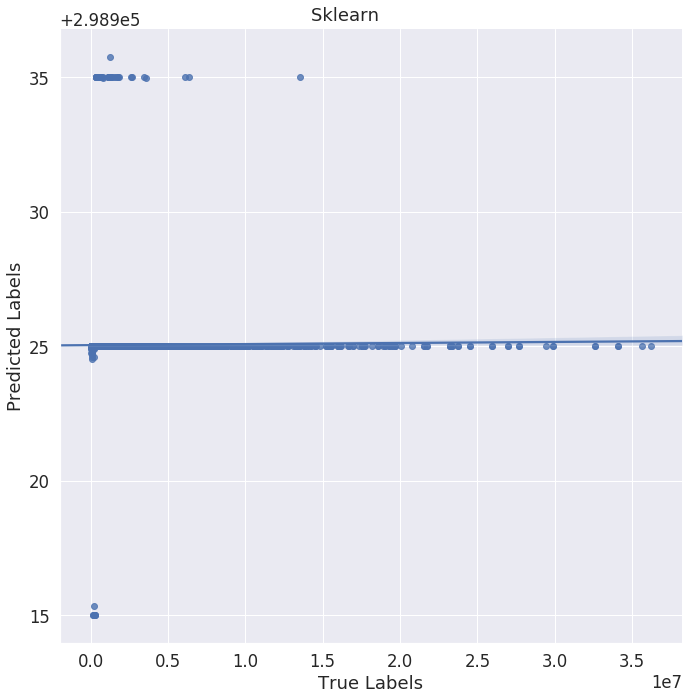

In [0]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, size = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sns.set(font_scale = 1.5)


## 5.2 Prediciting Likes

### 5.2.1 spliting the data into train and test in ratio of  80:20 

In [0]:
likes=youtube['likes']
youtube.drop(['likes'],axis=1,inplace=True)

In [0]:
train,test,y_train,y_test=train_test_split(youtube,likes, test_size=0.2,shuffle=False)

In [0]:
print(train.shape,test.shape,y_train.shape,y_test.shape)


(26741, 15) (6686, 15) (26741,) (6686,)


### 5.2.2 Linear Regression

In [0]:
# REGRESSION ANALYSIS

# LINEAR REGRESSION

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(train, y_train)

# predicting the  test set results
y_pred = model.predict(test)
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(test, y_test))
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
print(SK)

Root means score 66087.14030288826
Variance score: 0.41
Result : 0.41165018949568266
       True Labels  Predicted Labels
28345         3889      15660.201538
28347         5442      13818.440486
28348        50481      38877.389162
28349         1530      10568.924321
28350         2132        -89.321376
28351        23683      39947.245307
28352         1360      -6821.451901
28353         3810      17506.889522
28354          524       -367.593638
28355        19565      61811.416744
28356          315      -7938.254804
28357          550       1230.482463
28358        76979      71070.784466
28359        98051      61851.697931
28360          928      -4059.617874
28361         1775      -1012.445266
28362         3947        698.096920
28363         2140       8551.640791
28364         1018       7297.467815
28365        20691      23713.179939
28366        55987      59829.829738
28367          254      -9809.183498
28368        14591      30127.021636
28369          990        3

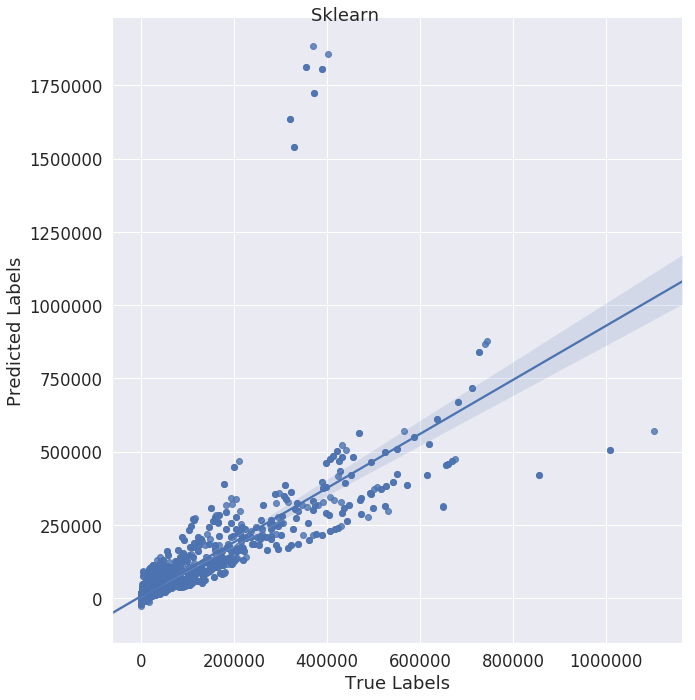

In [0]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, size = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sns.set(font_scale = 1.5)

### 5.2.3 Random Forest

### 5.2.3.1 Hypermeter Turning

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 51.5min finished
Best HyperParameter:  {'max_depth': 25, 'n_estimators': 160}
0.949893426983485


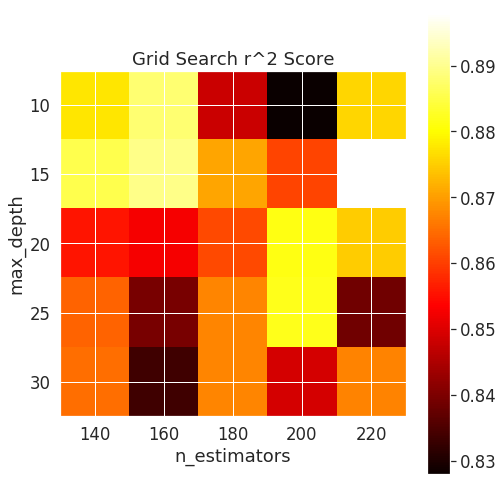

In [0]:
from sklearn.ensemble import RandomForestRegressor

nEstimator = [140,160,180,200,220]
depth = [10,15,20,25,30]

RF = RandomForestRegressor()
hyperParam = [{'n_estimators':nEstimator,'max_depth': depth}]
gsv = GridSearchCV(RF,hyperParam,cv=5,verbose=1,scoring='r2',n_jobs=-1)
gsv.fit(train, y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
scores = gsv.cv_results_['mean_test_score'].reshape(len(nEstimator),len(depth))

plt.figure(figsize=(8, 8))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.colorbar()
plt.xticks(np.arange(len(nEstimator)), nEstimator)
plt.yticks(np.arange(len(depth)), depth)
plt.title('Grid Search r^2 Score')
plt.show()

### 5.2.3.2 Random Forest using the optimal hypermeter

In [0]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 160,max_depth=25)
model.fit(train, y_train)


# predicting the  test set results
y_pred = model.predict(test)
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(test, y_test))
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
print(SK)

Root means score 17450.57758484616
Variance score: 0.96
Result : 0.9589775768109545
       True Labels  Predicted Labels
28345         3889       3919.554960
28347         5442       5558.837526
28348        50481      50138.903843
28349         1530       1554.451208
28350         2132       2154.127913
28351        23683      24038.420188
28352         1360       1379.506226
28353         3810       3857.110093
28354          524        530.415418
28355        19565      20243.088426
28356          315        313.174371
28357          550        545.151533
28358        76979      65033.644444
28359        98051      98708.308889
28360          928        927.788036
28361         1775       1831.989000
28362         3947       3974.208423
28363         2140       2182.743432
28364         1018       1047.970943
28365        20691      20529.167361
28366        55987      51542.325000
28367          254        331.536574
28368        14591      18076.666667
28369          990        98

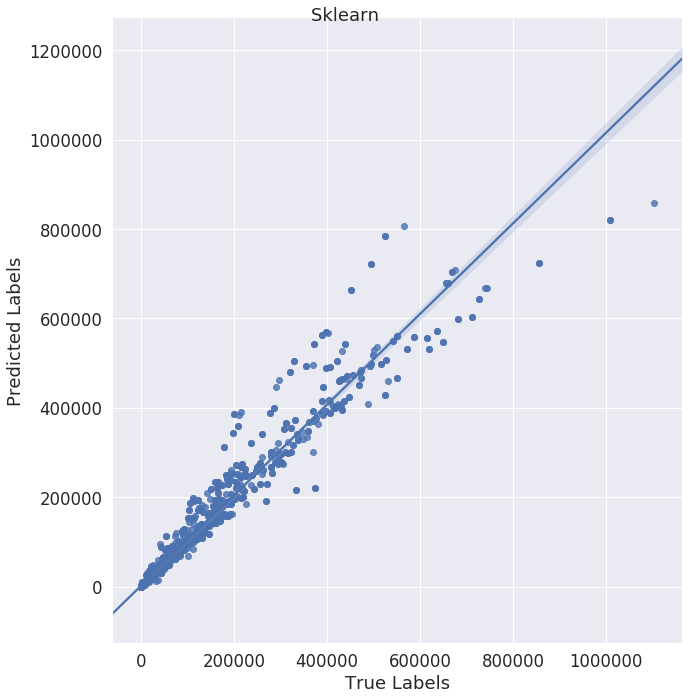

In [0]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, size = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sns.set(font_scale = 1.5)

### 5.2.3 svm

### 5.2.3.1 Hypermeter Turning

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 17.2min finished
Best HyperParameter:  {'C': 100, 'gamma': 0.01}
-0.06939063835469278


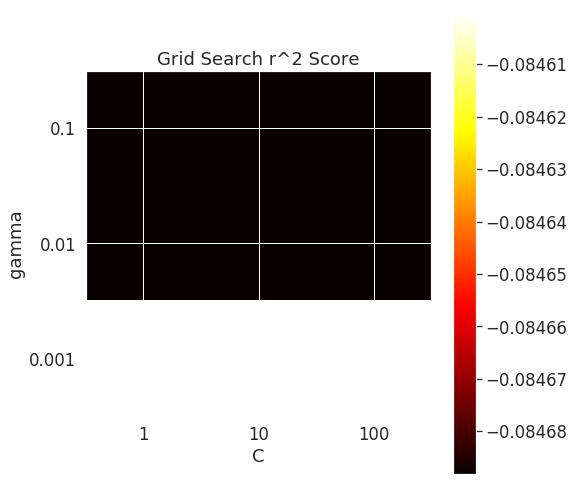

In [0]:
from sklearn.svm import SVR
sv = SVR(kernel='rbf')
C=[1, 10, 100]
gamma=[0.1,0.01,0.001]
hyperParam = [{'C':C,'gamma':gamma}]
gsv = GridSearchCV(sv,hyperParam,cv=5,verbose=1,scoring='r2',n_jobs=-1)
gsv.fit(train, y_train)

print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
scores = gsv.cv_results_['mean_test_score'].reshape(len(C),len(gamma))

plt.figure(figsize=(8, 8))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('C')
plt.ylabel('gamma')
plt.colorbar()
plt.xticks(np.arange(len(C)), C)
plt.yticks(np.arange(len(gamma)), gamma)
plt.title('Grid Search r^2 Score')
plt.show()

### 5.2.3.2 Random Forest using the optimal hypermeter

In [0]:
model = SVR(kernel='rbf',C=10,gamma=0.001)
model.fit(train, y_train)


# predicting the  test set results
y_pred = model.predict(test)
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(test, y_test))
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
print(SK)

Root means score 91814.54984756917
Variance score: -0.14
Result : -0.13559825673796744
       True Labels  Predicted Labels
28345         3889       3250.588867
28347         5442       3250.588867
28348        50481       3250.588867
28349         1530       3250.588867
28350         2132       3250.588867
28351        23683       3250.588867
28352         1360       3250.588867
28353         3810       3250.588867
28354          524       3250.588867
28355        19565       3250.588867
28356          315       3250.588867
28357          550       3250.588867
28358        76979       3250.588867
28359        98051       3250.588867
28360          928       3250.588867
28361         1775       3250.588867
28362         3947       3250.588867
28363         2140       3250.588867
28364         1018       3250.588867
28365        20691       3250.588867
28366        55987       3250.588867
28367          254       3250.588867
28368        14591       3250.588867
28369          990       

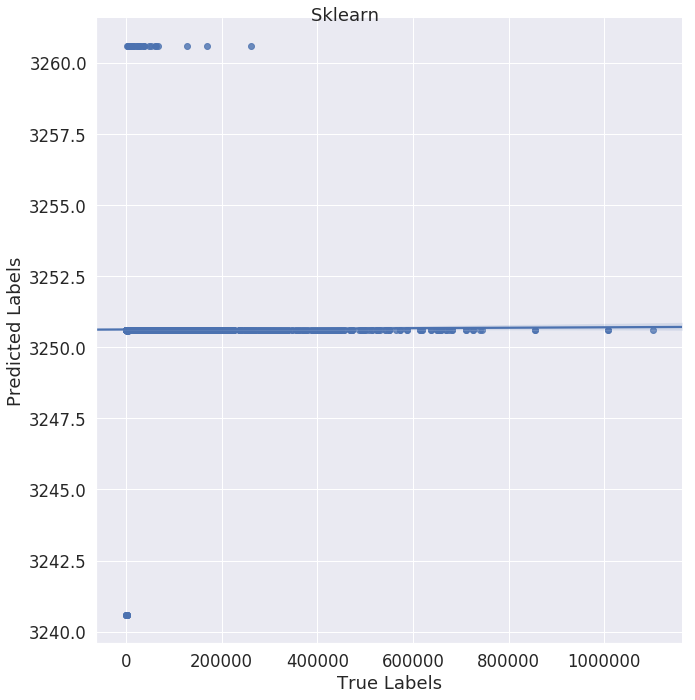

In [0]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, size = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sns.set(font_scale = 1.5)


## 5.3 Prediciting No of Comment

### 5.3.1 spliting the data into train and test in ratio of  80:20 

In [0]:
likes=youtube['comment_count']
youtube.drop(['comment_count'],axis=1,inplace=True)

In [0]:
train,test,y_train,y_test=train_test_split(youtube,likes, test_size=0.2,shuffle=False)

In [158]:
print(train.shape,test.shape,y_train.shape,y_test.shape)


(26741, 15) (6686, 15) (26741,) (6686,)


### 5.3.2 Linear Regression

In [0]:
# REGRESSION ANALYSIS

# LINEAR REGRESSION

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(train, y_train)

# predicting the  test set results
y_pred = model.predict(test)
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(test, y_test))
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
print(SK)

Root means score 13765.545213333013
Variance score: 0.35
Result : 0.3512972482705917
       True Labels  Predicted Labels
28345          213       -365.038691
28347          582        538.092856
28348         2849       4980.844821
28349          525       -130.519850
28350          363        906.910601
28351         2111       2001.956414
28352          153        223.536602
28353          186      -2007.769117
28354          168       -244.815740
28355         3511       -915.746461
28356           11         56.171260
28357           20        173.601496
28358         7883       7110.742682
28359         7556       9897.757342
28360           88        126.152494
28361          184        563.711091
28362          382        413.946340
28363          128        197.112011
28364          106         36.486526
28365          769        787.602964
28366         9207       6403.366071
28367          266        402.537191
28368         3868       1687.786253
28369           39       -1

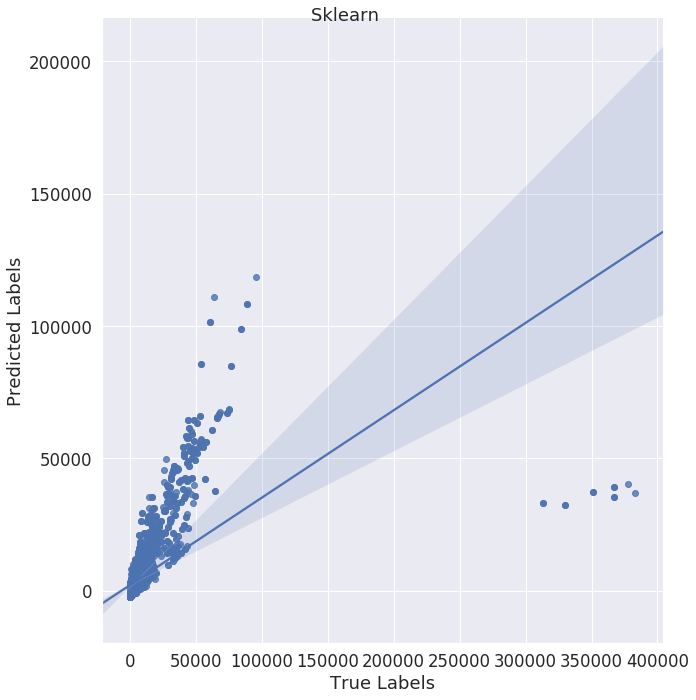

In [0]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, size = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sns.set(font_scale = 1.5)

### 5.3.3 Random Forest

### 5.3.3.1 Hypermeter Turning

In [0]:
print("Fitting 5 folds for each of 25 candidates, totalling 125 fits")
print("[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.")
print("[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 15.7min")
print("[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 56.4min finished")
print("Best HyperParameter:  {'max_depth': 20, 'n_estimators': 140}")
print("0.8239443935708084")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 56.4min finished
Best HyperParameter:  {'max_depth': 20, 'n_estimators': 140}
0.8239443935708084


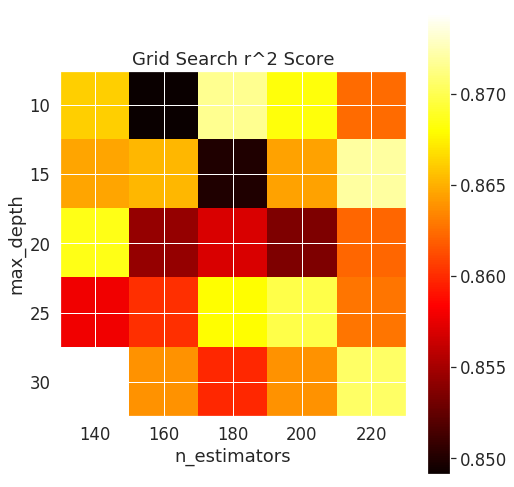

In [0]:
nEstimator = [140,160,180,200,220]
depth = [10,15,20,25,30]

RF = RandomForestRegressor()
hyperParam = [{'n_estimators':nEstimator,'max_depth': depth}]
gsv = GridSearchCV(RF,hyperParam,cv=5,verbose=1,scoring='r2',n_jobs=-1)
gsv.fit(train, y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
scores = gsv.cv_results_['mean_test_score'].reshape(len(nEstimator),len(depth))

plt.figure(figsize=(8, 8))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.colorbar()
plt.xticks(np.arange(len(nEstimator)), nEstimator)
plt.yticks(np.arange(len(depth)), depth)
plt.title('Grid Search r^2 Score')
plt.show()

### 5.3.3.1 RandomForest optimal Hypermeter

In [0]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 140,max_depth=20)
model.fit(train, y_train)


# predicting the  test set results
y_pred = model.predict(test)
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(test, y_test))
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
print(SK)

Root means score 7645.035197221102
Variance score: 0.80
Result : 0.7999134554277574
       True Labels  Predicted Labels
28345          213        211.060279
28347          582        583.549664
28348         2849       2871.040434
28349          525        530.472591
28350          363        373.481647
28351         2111       2130.238475
28352          153        153.240597
28353          186        194.373823
28354          168        168.231653
28355         3511       3363.945604
28356           11         11.179009
28357           20         20.383520
28358         7883       8120.525833
28359         7556       7658.462693
28360           88         87.648296
28361          184        184.645205
28362          382        384.400844
28363          128        127.706213
28364          106        105.022449
28365          769        806.491890
28366         9207      10702.607143
28367          266        267.070867
28368         3868       4075.164286
28369           39         3

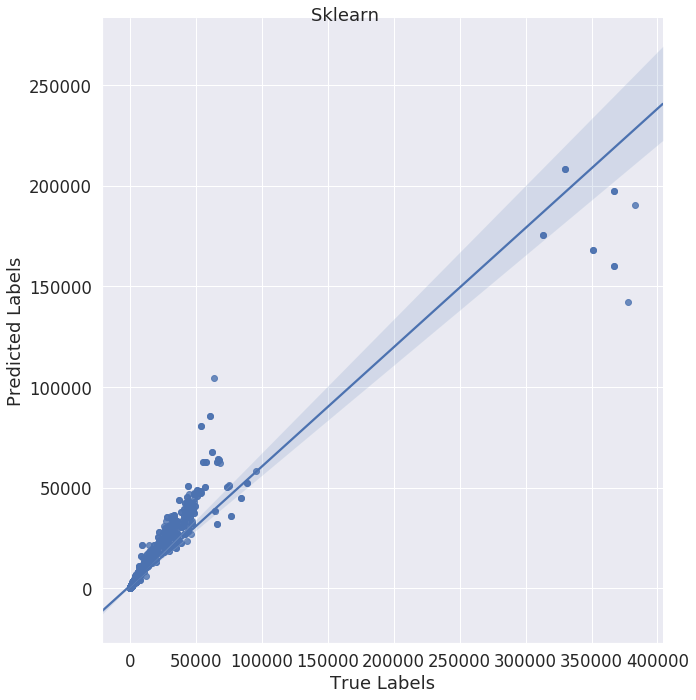

In [0]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, size = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sns.set(font_scale = 1.5)


### 5.3.4 SVM

### 5.3.4.1 Hypermeter Turning

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 18.2min finished
Best HyperParameter:  {'C': 100, 'gamma': 0.1}
-0.046846914449953064


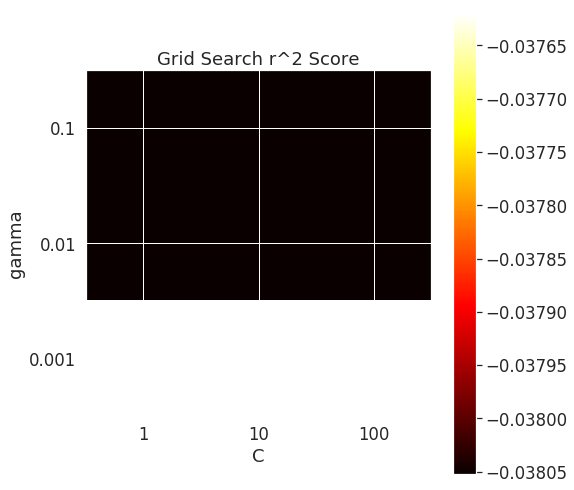

In [137]:
from sklearn.svm import SVR
sv = SVR(kernel='rbf')
C=[1, 10, 100]
gamma=[0.1,0.01,0.001]
hyperParam = [{'C':C,'gamma':gamma}]
gsv = GridSearchCV(sv,hyperParam,cv=5,verbose=1,scoring='r2',n_jobs=-1)
gsv.fit(train, y_train)

print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
scores = gsv.cv_results_['mean_test_score'].reshape(len(C),len(gamma))

plt.figure(figsize=(8, 8))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('C')
plt.ylabel('gamma')
plt.colorbar()
plt.xticks(np.arange(len(C)), C)
plt.yticks(np.arange(len(gamma)), gamma)
plt.title('Grid Search r*2 Score')
plt.show()

### 5.3.4.2 SVM using optimal Hypermeter

In [0]:
model = SVR(kernel='rbf',C=100,gamma=0.01)
model.fit(train, y_train)


# predicting the  test set results
y_pred = model.predict(test)
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(test, y_test))
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
print(SK)

Root means score 17458.253638843522
Variance score: -0.04
Result : -0.04342323471595777
       True Labels  Predicted Labels
28345          213        363.409141
28347          582        363.409141
28348         2849        363.409141
28349          525        363.409141
28350          363        363.409141
28351         2111        363.409141
28352          153        363.409141
28353          186        363.409141
28354          168        363.409141
28355         3511        363.409141
28356           11        363.409141
28357           20        363.409141
28358         7883        363.409141
28359         7556        363.409141
28360           88        363.409141
28361          184        363.409141
28362          382        363.409141
28363          128        363.409141
28364          106        363.409141
28365          769        363.409141
28366         9207        363.409141
28367          266        363.409141
28368         3868        363.409141
28369           39      

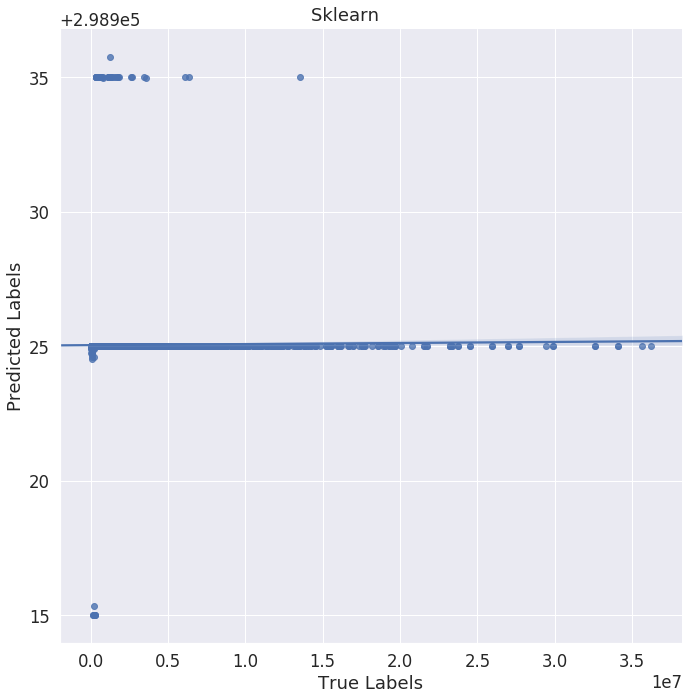

In [0]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, size = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sns.set(font_scale = 1.5)


## 6.Conclusion
### View Predicition

|Model|RMS|Variance|Result|
|-----|---|--------|------|
|Linear Regression|1505083.9931365433|0.73|0.734|
|Random Forests|363278.23332000454|0.98|0.984|
|SVM|3103564.659525556|-0.13| -0.127|

### Like Predicition

|Model|RMS|Variance|Result|
|-----|---|--------|------|
|Linear Regression| 66087.14030288826|0.41|0.411|
|Random Forests|17450.57758484616|0.96|0.958|
|SVM|91814.54984756917|-0.14|  -0.135|


### Comment Count Predicition


|Model|RMS|Variance|Result|
|-----|---|--------|------|
|Linear Regression|13765.545213333013|0.35|0.351|
|Random Forests|7645.035197221102|0.80|0.799|
|SVM|17458.253638843522|-0.04|-0.043|

